In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv("PokemonStats.csv")
df.head()

,ID,Name,Total,HP,Attack,Defense,SpAtk,SpDef,Speed,Type1,Type2,Height,Weight
0,1,Bulbasaur,318,45,49,49,65,65,45,Grass,Poison,0.7,6.9
1,2,Ivysaur,405,60,62,63,80,80,60,Grass,Poison,1.0,13.0
2,3,Venusaur,525,80,82,83,100,100,80,Grass,Poison,2.0,100.0
3,3,Venusaur Mega Venusaur,625,80,100,123,122,120,80,Grass,Poison,2.4,155.5
4,4,Charmander,309,39,52,43,60,50,65,Fire,NaN,0.6,8.5


In [2]:
import scipy.stats
import random
#炎タイプを抽出
Fire1=df[df["Type1"]=="Fire"]
Fire2=df[df["Type2"]=="Fire"]
#Fire1とFire2を結合
Fire = pd.concat([Fire1,Fire2],axis=0,ignore_index=True)
#高さと重さを抽出
Fire_stats=Fire[["Height","Weight"]]
#データの標準化
Fire_sc=scipy.stats.zscore(Fire_stats, axis=0)
Fire_sc.head()

,Height,Weight
0,-0.825454,-0.534132
1,-0.183734,-0.451331
2,0.586329,0.112501
3,0.586329,0.270216
4,0.586329,0.191358


In [3]:
#訓練データとテストデータの分割
from sklearn.model_selection import train_test_split
xf_train,xf_test,yf_train,yf_test = train_test_split(Fire_sc["Height"],Fire_sc["Weight"],test_size=0.3,random_state=0)
#訓練データをpandasデータフレームに変換(変換しないとfit関数を使って計算できないため)
xf=pd.DataFrame(xf_train)
yf=pd.DataFrame(yf_train)
xft=pd.DataFrame(xf_test)
yft=pd.DataFrame(yf_test)

In [4]:
#線形単回帰
from sklearn.linear_model import LinearRegression
model=LinearRegression()
#xyの値を元に回帰係数・切片を計算
Fire_l=model.fit(xf,yf)
print("回帰係数：",Fire_l.coef_,"切片：",Fire_l.intercept_)
#訓練データの予測値(目的変数yの予測値)を算出
pf=Fire_l.predict(xf)

回帰係数： [[0.54764078]] 切片： [-0.04381718]


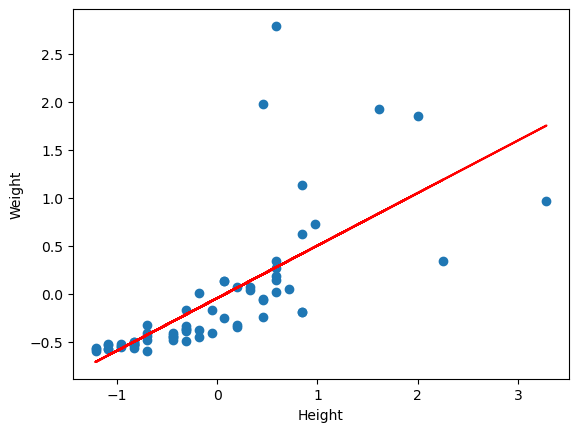

In [5]:
#グラフのプロット
import matplotlib.pyplot as plt
%matplotlib inline
#訓練データの散布図
plt.scatter(xf_train,yf_train)
plt.xlabel("Height")
plt.ylabel("Weight")
#回帰直線のプロット
plt.plot(xf,pf,c="r")
plt.show()

In [6]:
#テストデータ
Fire_l=model.fit(xft,yft)
print("回帰係数：",Fire_l.coef_,"切片：",Fire_l.intercept_)
#予測値を算出
pft=Fire_l.predict(xft)

回帰係数： [[1.0563321]] 切片： [0.03334431]


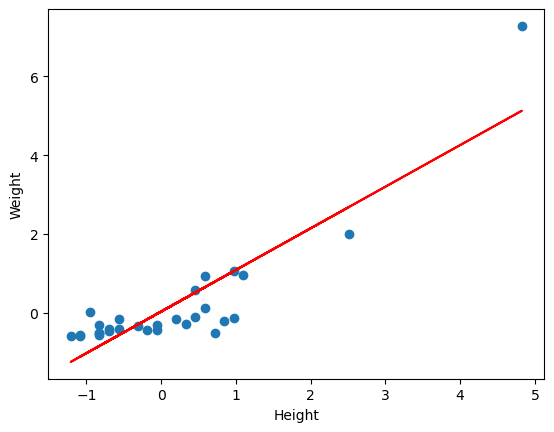

In [7]:
#テストデータのグラフ
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(xf_test,yf_test)
plt.xlabel("Height")
plt.ylabel("Weight")
plt.plot(xft,pft,c="r")
plt.show()

In [8]:
from sklearn.metrics import mean_squared_error

#平均二乗誤差による性能評価
print('MSE(train): % 4f' %(mean_squared_error(yf,pf)))
print('MSE(test): % 4f' %(mean_squared_error(yft,pft)))

#平均二乗平方根誤差による性能評価
print('RMSE(train): % 4f' %(np.sqrt(mean_squared_error(yf,pf))))
print('RMSE(test): % 4f' %(np.sqrt(mean_squared_error(yft,pft))))

MSE(train):  0.236298
MSE(test):  0.487463
RMSE(train):  0.486105
RMSE(test):  0.698186


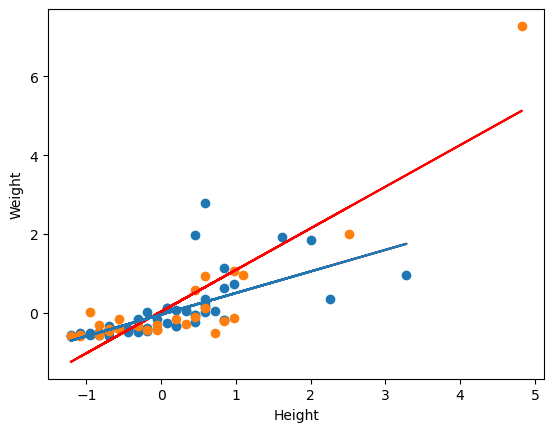

In [9]:
#訓練データとテストデータのグラフ
%matplotlib inline
plt.scatter(xf_train,yf_train)
plt.scatter(xf_test,yf_test)
plt.plot(xf,pf,color="r")
plt.plot(xft,pft,color="r")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.plot(xf,pf)
plt.show()

In [10]:
#線形サポートベクター回帰
from sklearn.svm import SVR
svr = SVR(kernel='linear')
Fire_svr=svr.fit(xf,yf)
svrpf=Fire_svr.predict(xf)
print("回帰係数",Fire_svr.coef_)
print("切片",Fire_svr.intercept_)

回帰係数 [[0.42746376]]
切片 [-0.1592253]


/Users/isonotakashimakoto/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


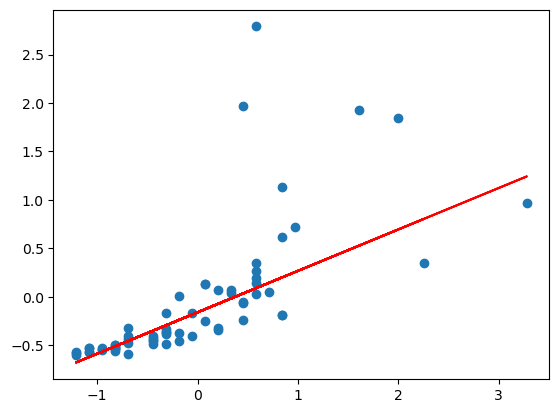

In [11]:
%matplotlib inline
plt.scatter(xf,yf)
plt.plot(xf,svrpf,color="r")
plt.show()

In [12]:
Fire_svrt=svr.fit(xft,yft)
print(Fire_svrt.coef_)
print(Fire_svrt.intercept_)
Fire_svrtp=Fire_svrt.predict(xft)

[[0.7086575]]
[0.08090641]


/Users/isonotakashimakoto/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


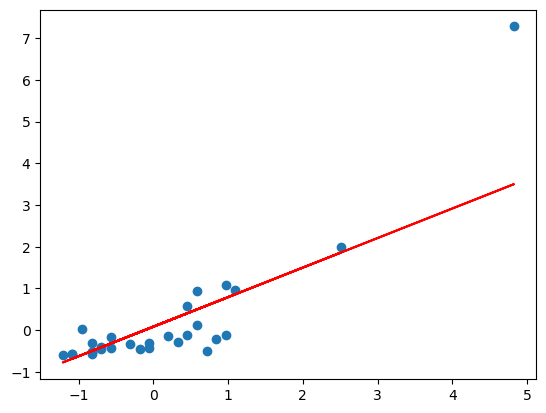

In [13]:
%matplotlib inline
plt.scatter(xft,yft)
plt.plot(xft,Fire_svrtp,c="r")
plt.show()

In [14]:
#非線形サポートベクター回帰
svrk = SVR(kernel='rbf')
Fire_svrk=svrk.fit(xf,yf)
print("切片",Fire_svrk.intercept_)
svrpfk=Fire_svrk.predict(xf)

切片 [0.41016136]


/Users/isonotakashimakoto/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


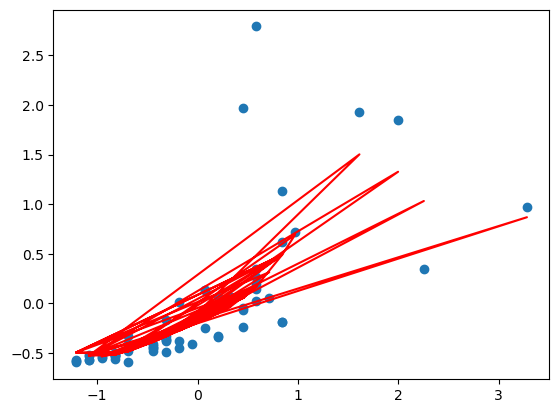

In [15]:
#グラフのプロット
%matplotlib inline
plt.scatter(xf,yf)
plt.plot(xf,svrpfk,color="r")
plt.show()

In [16]:
#３変量の標準化
Fire_st=Fire[["Total","HP","Defense"]]
Fire_st=scipy.stats.zscore(Fire_st, axis=0)
Fire_st.head()
yt=Fire_st["Total"]
xt=Fire_st[["HP","Defense"]]

In [17]:
#訓練データとテストデータを分割
from sklearn.model_selection import train_test_split
xt_train,xt_test,yt_train,yt_test = train_test_split(xt,yt,test_size=0.3,random_state=0)

In [18]:
#重回帰分析
from sklearn.linear_model import LinearRegression
model=LinearRegression()
#xyの値を元に回帰係数・切片を計算
Fire_stl=model.fit(xt_train,yt_train)
print("回帰係数：",Fire_stl.coef_)
print('切片: %.2f' % Fire_stl.intercept_)
#訓練データの予測値(目的変数yの予測値)を算出
Fire_p=Fire_stl.predict(xt_train)

回帰係数： [0.47314972 0.47258478]
切片: -0.03


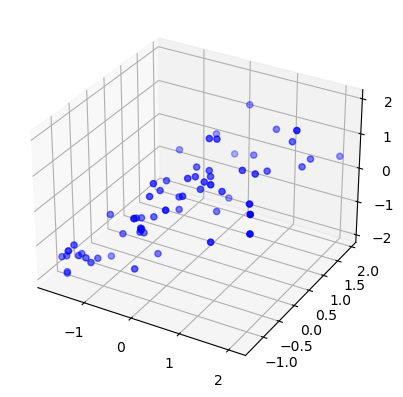

In [19]:
#3Dグラフ
%matplotlib inline
fig = plt.figure()
 
# axをfigureに設定
ax = fig.add_subplot( projection='3d')
 
# axesにplot
x1=xt_train["HP"]
x2=xt_train["Defense"]
z=yt_train
ax.scatter(x1, x2, z, c='b')
# 表示する
plt.show()

In [20]:
#多項式回帰
from sklearn.preprocessing import PolynomialFeatures
#インスタンス生成
quadratic = PolynomialFeatures(degree=2)
#説明変数を２次に変換
x_quad_train  = quadratic.fit_transform(xt_train)
#回帰分析
Fire_pl=model.fit(x_quad_train,yt_train)
print("回帰係数",Fire_pl.coef_)
print("切片",Fire_pl.intercept_)

回帰係数 [ 0.          0.35842518  0.62166431 -0.01284265 -0.13109341 -0.18689442]
切片 0.21106659634312003


In [21]:
#説明変数を２次に変換
x_quad_test  = quadratic.fit_transform(xt_test)
#回帰分析
Fire_pt=model.fit(x_quad_test,yt_test)
print("回帰係数",Fire_pt.coef_)
print("切片",Fire_pt.intercept_)

回帰係数 [ 0.          0.24903928  0.91639821 -0.05431539  0.44601677 -0.31560885]
切片 0.3330448414216577


In [22]:
#次元削減
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

features = Fire[["Total","HP","Attack","Defense","SpAtk","SpDef","Speed"]]
x_scaled = StandardScaler().fit_transform(features)

#特徴量を2次元に変換
pca = PCA(n_components=2)
fpca=pd.DataFrame(pca.fit_transform(x_scaled),columns=["第一主成分","第二主成分"])
fpca

,第一主成分,第二主成分
0,-2.950131,0.087370
1,-1.137116,0.162174
2,1.251679,0.271763
3,2.933889,0.146888
4,3.061201,-0.167933
...,...,...
90,0.055818,0.962684
91,-0.712348,-1.054844
92,1.384337,-2.071739
93,0.245243,0.329156


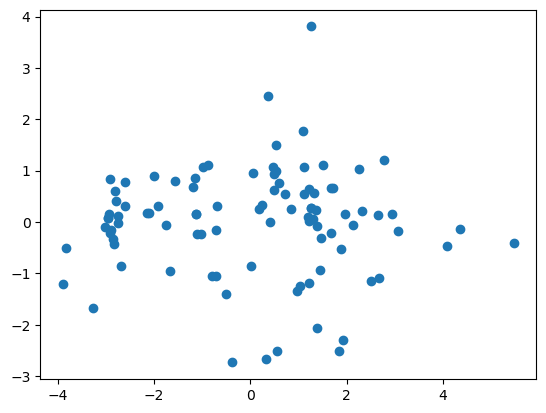

In [23]:
#次元削減後のデータのプロット
%matplotlib inline
plt.scatter(fpca["第一主成分"],fpca["第二主成分"])

In [24]:
#各ステータス
print('寄与率(%): ', pca.explained_variance_ratio_)
print('累積寄与率(%): ', np.cumsum(pca.explained_variance_ratio_))
print('固有値(主成分の分散): ', pca.explained_variance_)
print('固有ベクトル(主成分の方向): ', pca.components_)

寄与率(%):  [0.58789869 0.15527963]
累積寄与率(%):  [0.58789869 0.74317832]
固有値(主成分の分散):  [4.15907055 1.09852078]
固有ベクトル(主成分の方向):  [[ 0.4915362   0.37828116  0.34416476  0.3558566   0.36559657  0.41334397
   0.25631647]
 [ 0.0444479   0.0904757   0.40726089 -0.47837975 -0.27628021 -0.23972679
   0.67921294]]


In [25]:
#kmeans法
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=2, random_state=0)
pred=pd.DataFrame(kmeans_model.fit_predict(fpca))
pred

/Users/isonotakashimakoto/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,0
0,0
1,0
2,1
3,1
4,1
...,...
90,1
91,0
92,1
93,1


In [26]:
#クラスラベルを結合
fc=pd.concat([fpca,pred],axis=1,ignore_index=True)
fc

,0,1,2
0,-2.950131,0.087370,0
1,-1.137116,0.162174,0
2,1.251679,0.271763,1
3,2.933889,0.146888,1
4,3.061201,-0.167933,1
...,...,...,...
90,0.055818,0.962684,1
91,-0.712348,-1.054844,0
92,1.384337,-2.071739,1
93,0.245243,0.329156,1


In [ ]:
keisan=1+2
keisan

In [3]:
hellow="ポケモンゲットだぜ！！"
print(hellow)

ポケモンゲットだぜ！！
